# Recap of Classical Parameter Estimation and Confidence Intervals for Gaussian Distributions

In [1]:
import numpy as np
from scipy.stats import norm

Alwas important to fix the random state for reproducibility

In [2]:
np.random.seed(6563)

## Creating a random sample

In [3]:
rv = norm(loc=5.5, scale=2.5)

In [4]:
sample = rv.rvs(size=8)

In [5]:
print(sample)

[-0.5262254  10.34254082  5.96780767  6.50309614  2.3285979   6.21960724
  8.32043191  3.75429883]


# t-Student eqs.

$$\frac{\bar{\mu} - \mu}{\bar{\sigma}/\sqrt{N}} \sim t_{N-1}$$

$$\mu = \bar{\mu} -  t_{N-1} \frac{\bar{\sigma}}{\sqrt{N}}$$

In [6]:
mean_est = np.mean(sample)
std_est = np.std(sample, ddof=1)

In [7]:
print(mean_est)
print(std_est)

5.363769389502728
3.4313700805078944


In [8]:
from scipy.stats import t

t_rv = t(len(sample)-1)

In [9]:
t_low, t_up = t_rv.ppf([0.16, 0.84])
print(t_low)
print(t_up)

-1.0702873962739643
1.070287396273964


In [11]:
mu_low = mean_est - t_up * std_est / np.sqrt(len(sample))
mu_up = mean_est - t_low * std_est / np.sqrt(len(sample))

print(mu_low, mu_up)

4.065326125051029 6.662212653954428


## What happens with a larger sample?

In [12]:
sample = rv.rvs(size=16)

In [13]:
sample

array([7.42865476, 5.19305179, 3.36856561, 7.76427963, 7.57003511,
       5.00105339, 3.21964277, 1.41841386, 6.28311883, 6.74635959,
       8.41139216, 5.92073382, 3.97446628, 6.76148967, 6.12544691,
       6.41113714])

In [14]:
t_rv = t(len(sample)-1)
t_low, t_up = t_rv.ppf([0.16, 0.84])
mean_est = np.mean(sample)
std_est = np.std(sample, ddof=1)

mu_low = mean_est - t_up * std_est / np.sqrt(len(sample))
mu_up = mean_est - t_low * std_est / np.sqrt(len(sample))

print(mu_low, mu_up)

5.232366650427018 6.217363512548744


We get narrower confidence intervals.

# Outliers

Let's add a couple of outliers by hand to see what happens to our analysis.

In [16]:
sample = np.append(sample, [50., 55.])

In [17]:
sample

array([ 7.42865476,  5.19305179,  3.36856561,  7.76427963,  7.57003511,
        5.00105339,  3.21964277,  1.41841386,  6.28311883,  6.74635959,
        8.41139216,  5.92073382,  3.97446628,  6.76148967,  6.12544691,
        6.41113714, 50.        , 55.        ])

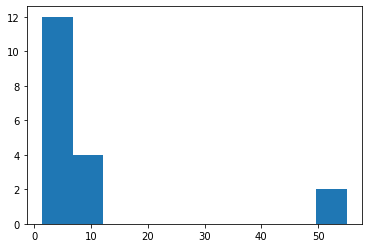

In [20]:
import matplotlib.pyplot as plt

plt.hist(sample)
plt.show()

In [21]:
t_rv = t(len(sample)-1)
t_low, t_up = t_rv.ppf([0.16, 0.84])
mean_est = np.mean(sample)
std_est = np.std(sample, ddof=1)

mu_low = mean_est - t_up * std_est / np.sqrt(len(sample))
mu_up = mean_est - t_low * std_est / np.sqrt(len(sample))

print(mu_low, mu_up)

7.23824106835153 14.605963520960255


In [22]:
n_pix = np.pi * (2.5 / 2 / 0.3)**2 
std = np.sqrt(n_pix) * 49
print(std)

361.8759945598762


## So, BE CAREFUL WITH OUTLIERS!